In [ ]:
# 2025
# Supplementary Figure 1.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import Normalize
from matplotlib import cm


In [4]:
# Load data to use in analysis
df= pd.read_excel("Supplementary_Dataset.xlsx", sheet_name="NPQ-LOD")

In [5]:
# Build mapping dict for Mapping Target Names to be used in paper
df_target_names = pd.read_excel("Supplementary_Dataset.xlsx", sheet_name="Target Name")
mapping = dict(zip(df_target_names["Target Name on NULISAseq™ CNS Disease Panel "], df_target_names["Target Name used in the paper"]))

# rename targets in npq_lod sheet 
df["Target Name on NULISAseq™ CNS Disease Panel "] = df["Target Name on NULISAseq™ CNS Disease Panel "].replace(mapping)

In [6]:

# reverst CRP and APOE for tidy visualisation
df.loc[df["Target Name on NULISAseq™ CNS Disease Panel "] == "CRP", "NPQ-LOD"]*= -1 
df.loc[df["Target Name on NULISAseq™ CNS Disease Panel "] == "Apo-E", "NPQ-LOD"]*= -1 

In [7]:

# Sort markers by the median detectability value in descending order for better visualization
median_value = df.groupby("Target Name on NULISAseq™ CNS Disease Panel ")["NPQ-LOD"].median()
sorted_markers = median_value.sort_values(ascending=False).index


C:\Users\hbozkurt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\categorical.py:700: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  artists = ax.bxp(**boxplot_kws)


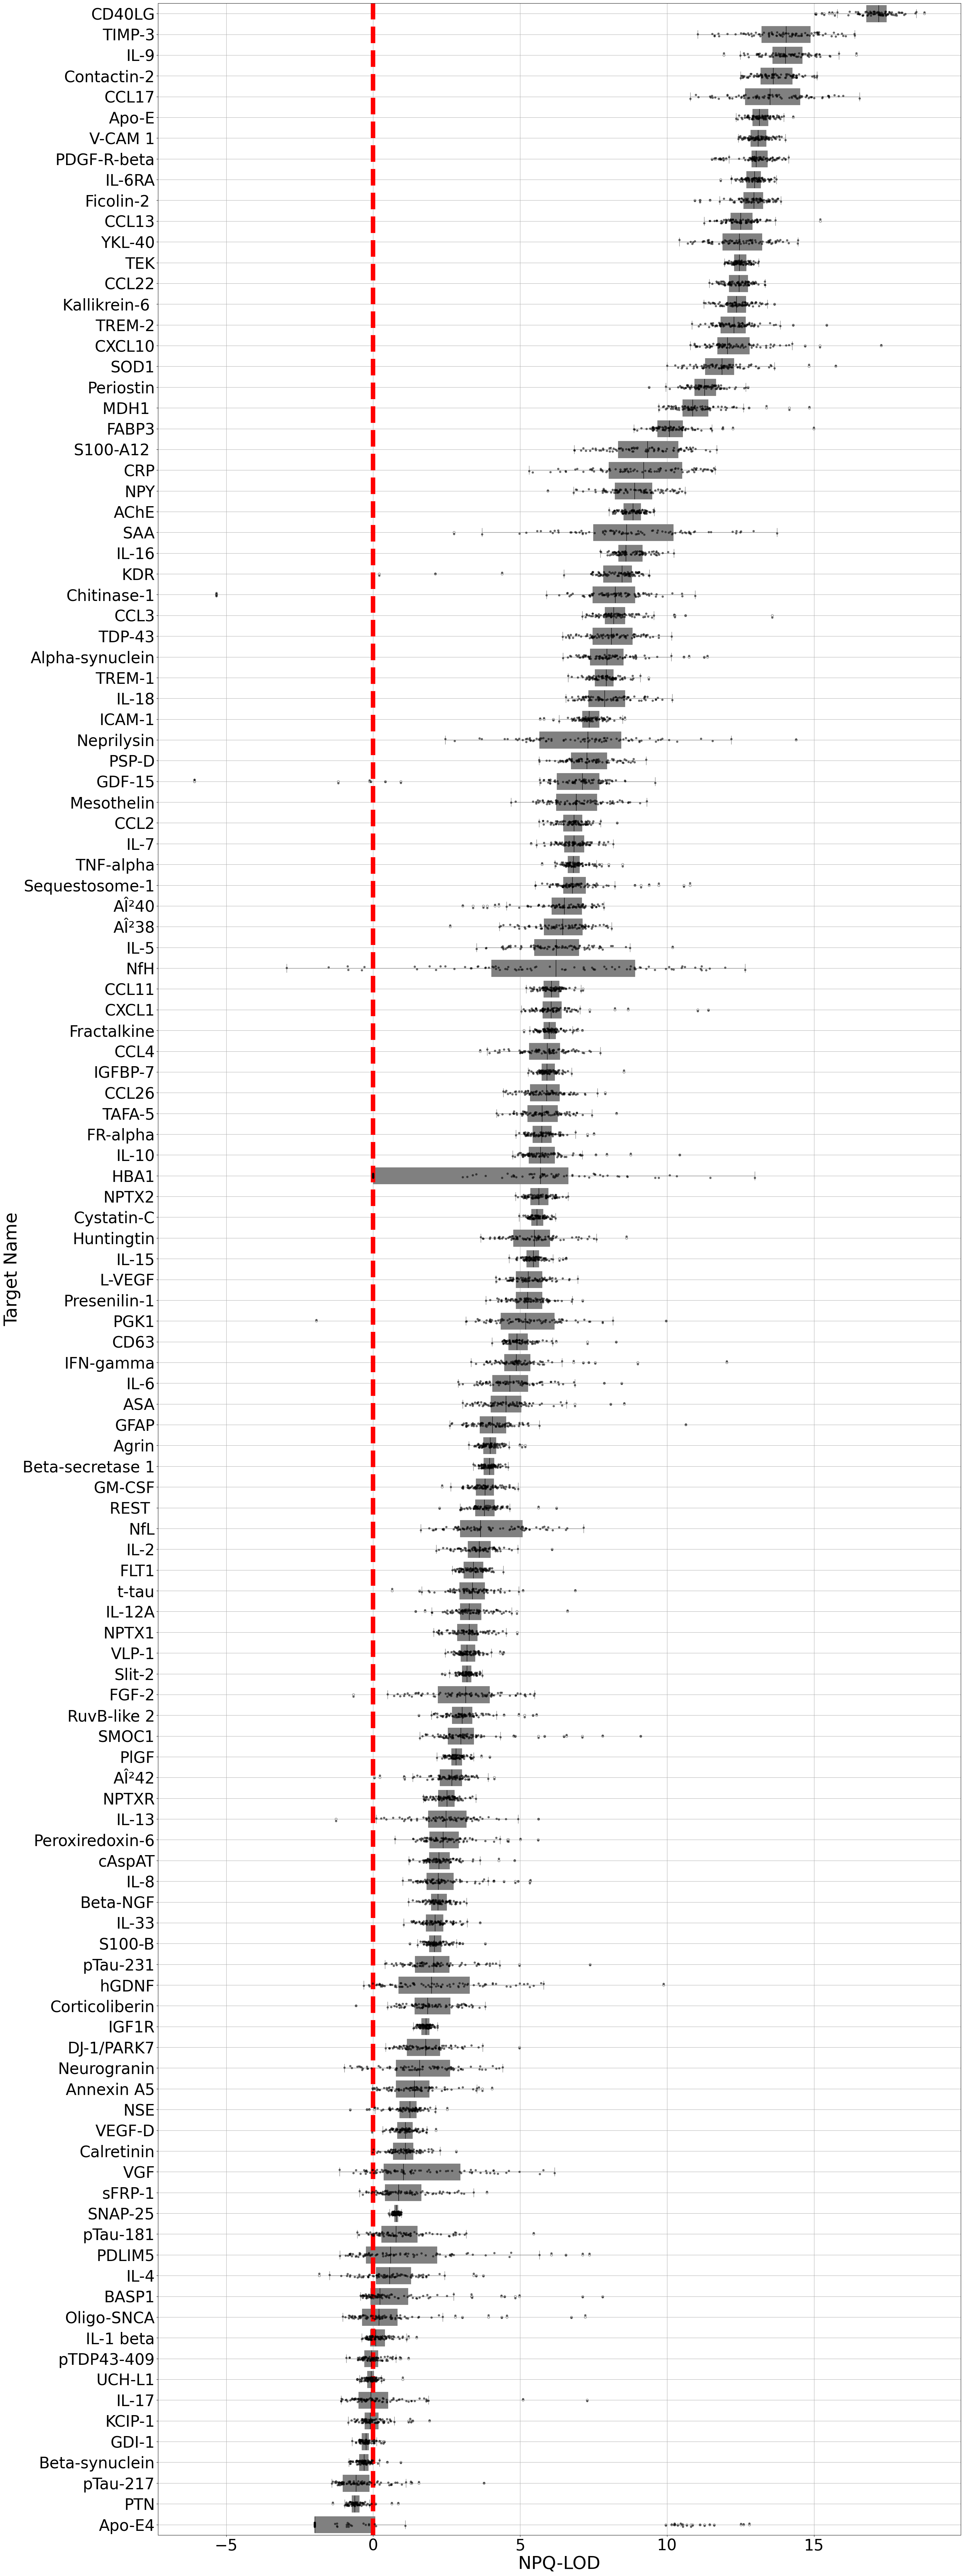

In [21]:

# Set up the plot - Supplementary Figure 1
plt.figure(figsize=(30, 80))

# Create the box plots per target
sns.boxplot(
    y="Target Name on NULISAseq™ CNS Disease Panel ", 
    x="NPQ-LOD", 
    data=df[df["Target Name on NULISAseq™ CNS Disease Panel "].isin(sorted_markers)], 
    order=sorted_markers,
    color='lightgray',  # Color for the box
    boxprops=dict(facecolor='lightgray', color='gray', linewidth=0.8),
    flierprops=dict(marker='o', color='red', markersize=5),
    medianprops=dict(color='black')
)

# Add jittered dots for each sample (strip plot)
sns.stripplot(
    y="Target Name on NULISAseq™ CNS Disease Panel ", 
    x="NPQ-LOD", 
    data=df[df["Target Name on NULISAseq™ CNS Disease Panel "].isin(sorted_markers)], 
    order=sorted_markers,
    color='black',  # Color of the dots can be changed here if needed
    jitter=True,    # Add jitter to spread the points
    alpha=0.6,      # Adjust transparency to avoid overplotting
    size=5          # Adjust the size of the dots
)

# Add a red dashed line for LOD == 0
plt.axvline(x=0, color='red', linestyle='--', linewidth = 10,label="LOD = 0")

# Show the plot
plt.xticks(fontsize = 35)
plt.yticks(fontsize = 35)
plt.ylabel("Target Name", fontsize = 40)
plt.xlabel("NPQ-LOD", fontsize = 40)
plt.tight_layout()
plt.grid()
plt.savefig(f".\\figures\\Detectability.png", dpi=300)
plt.show()

